In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [3]:
df = pd.read_csv('three_yr_stock_prices.csv')

In [4]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'ticker', 'date']]

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.index = df['date']

In [7]:
df.ticker.unique()

array(['ABAC', 'ACHC', 'ACST', 'ADRU', 'AEGR', 'AMIC', 'AMKR', 'AMSF',
       'ARKR', 'ATML', 'AVGO', 'BANR', 'BEAT', 'BGCP', 'BIS', 'BLDP',
       'BLMT', 'BOCH', 'BOOM', 'BPFH', 'BRCD', 'BYBK', 'CACQ', 'CADC',
       'CALM', 'CAMT', 'CARB', 'CBLI', 'CCMP', 'CCOI', 'CCRN', 'CDZI',
       'CFA', 'CGIX', 'CHKP', 'CIDM', 'CLIR', 'CLRO', 'CLUB', 'CMPR',
       'CNSL', 'COMM', 'COMT', 'CORI', 'COWN', 'CRRC', 'CTCM', 'CZR',
       'DAVE', 'DCOM', 'DISCK', 'DSWL', 'DTLK', 'DTSI', 'EGLT', 'EMMS',
       'ENT', 'ESEA', 'ESGR', 'FEIM', 'FEUZ', 'FLAT', 'FLDM', 'FMBH',
       'FONR', 'FORD', 'FSNN', 'GFN', 'GLDI', 'GLNG', 'GNBC', 'GNVC',
       'GRFS', 'GRID', 'GROW', 'HAYN', 'HOLI', 'HTLD', 'HWBK', 'IDRA',
       'IDSY', 'IEP', 'IFV', 'INTX', 'IPCI', 'ISHG', 'JBLU', 'KGJI', 'KIN',
       'KTEC', 'LEVYU', 'LHCG', 'LMAT', 'LOOK', 'LRCX', 'LVNTB', 'MARPS',
       'MATW', 'MBTF', 'MDVN', 'MDWD', 'MIFI', 'MIND', 'MLHR', 'MMLP',
       'MMSI', 'MRNS', 'MSEX', 'NATR', 'NETE', 'NEWT', 'NICK', 'NRCIB',
 

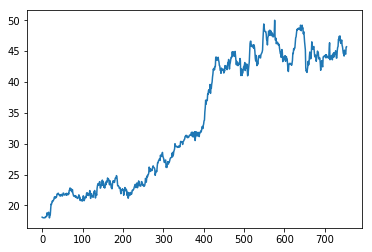

In [68]:
plt.plot(df[df.ticker == 'QCRH'].Open.values)

In [69]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

In [70]:
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(np.float(valid_set_size_percentage)/100*data.shape[0]));  
    test_set_size = int(np.round(np.float(test_set_size_percentage)/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [71]:
df_stock = df[df.ticker == 'QCRH'].copy()

In [72]:
df_stock.drop(['ticker'],1,inplace=True)
df_stock.drop(['Volume'],1,inplace=True)
df_stock.drop(['date'],1,inplace=True)

In [73]:
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

('df_stock.columns.values = ', ['Open', 'High', 'Low', 'Close'])


In [74]:
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

In [86]:
seq_len = 45 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)

In [87]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

('x_train.shape = ', (568, 44, 4))
('y_train.shape = ', (568, 4))
('x_valid.shape = ', (71, 44, 4))
('y_valid.shape = ', (71, 4))
('x_test.shape = ', (71, 44, 4))
('y_test.shape = ', (71, 4))


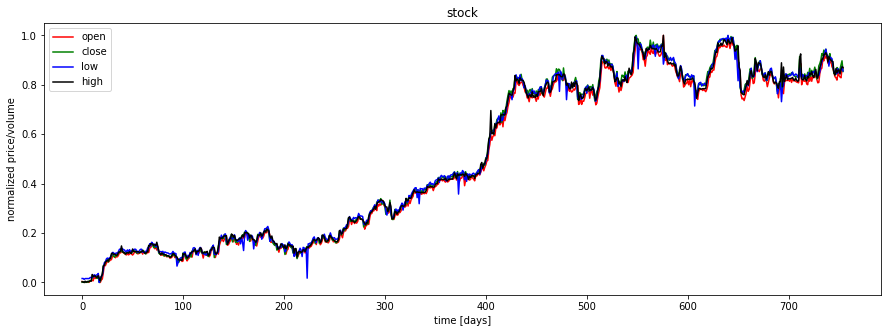

In [88]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.Open.values, color='red', label='open')
plt.plot(df_stock_norm.Close.values, color='green', label='close')
plt.plot(df_stock_norm.Low.values, color='blue', label='low')
plt.plot(df_stock_norm.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [89]:
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

In [90]:
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

In [92]:
with tf.Session() as sess: 
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    
    testing = x_test.copy()
    all_y = y_test_pred[0:-1]
    
    for i in range(0, 50):
        y_testing = sess.run(outputs, feed_dict={X: testing})
        next_y = np.reshape(y_testing[-1], (1,4))
        last_x = testing[-1][1:44]
        new_x = np.reshape(np.concatenate([last_x, next_y]), (1, 44, 4))
        print new_x
        testing = np.concatenate([testing, new_x])
        all_y = y_testing

0.00 epochs: MSE train/valid = 0.636434/0.704374
4.00 epochs: MSE train/valid = 0.000797/0.001411
9.00 epochs: MSE train/valid = 0.000629/0.001298
14.00 epochs: MSE train/valid = 0.000496/0.001210
19.00 epochs: MSE train/valid = 0.000484/0.001086
24.00 epochs: MSE train/valid = 0.000446/0.001071
29.00 epochs: MSE train/valid = 0.000413/0.001127
34.00 epochs: MSE train/valid = 0.000472/0.001250
39.00 epochs: MSE train/valid = 0.000365/0.000985
44.00 epochs: MSE train/valid = 0.000335/0.000857
49.00 epochs: MSE train/valid = 0.000325/0.000762
54.00 epochs: MSE train/valid = 0.000322/0.000794
59.00 epochs: MSE train/valid = 0.000333/0.000871
64.00 epochs: MSE train/valid = 0.000285/0.000678
69.00 epochs: MSE train/valid = 0.000347/0.000872
73.00 epochs: MSE train/valid = 0.000299/0.000787
78.00 epochs: MSE train/valid = 0.000276/0.000675
83.00 epochs: MSE train/valid = 0.000246/0.000587
88.00 epochs: MSE train/valid = 0.000246/0.000642
93.00 epochs: MSE train/valid = 0.000285/0.000648
98.

[[[ 0.81417864  0.83739837  0.83381272  0.84405145]
  [ 0.82198626  0.8217636   0.83381272  0.83440514]
  [ 0.80324797  0.81550969  0.83700863  0.82797428]
  [ 0.80012492  0.83427142  0.83381272  0.85048232]
  [ 0.82823235  0.82801751  0.84819431  0.8392283 ]
  [ 0.81417864  0.84677924  0.84819431  0.86655949]
  [ 0.83447845  0.84052533  0.84180249  0.83440514]
  [ 0.81417864  0.85303315  0.84819431  0.8585209 ]
  [ 0.83603998  0.8358349   0.85298818  0.84726688]
  [ 0.82823235  0.82958099  0.84819431  0.85209003]
  [ 0.8313554   0.84677924  0.85618408  0.87138264]
  [ 0.84540912  0.86241401  0.85139022  0.84405145]
  [ 0.82198626  0.83114447  0.83221477  0.82315113]
  [ 0.80793254  0.82645403  0.83700863  0.84083601]
  [ 0.80949407  0.85303315  0.83700863  0.87620579]
  [ 0.84540912  0.87023139  0.85298818  0.88585209]
  [ 0.86258588  0.88273921  0.87695749  0.90032154]
  [ 0.86727046  0.90462789  0.89293704  0.92604502]
  [ 0.90318551  0.90306442  0.90731863  0.91800643]
  [ 0.896939

[[[ 0.82823235  0.82801751  0.84819431  0.8392283 ]
  [ 0.81417864  0.84677924  0.84819431  0.86655949]
  [ 0.83447845  0.84052533  0.84180249  0.83440514]
  [ 0.81417864  0.85303315  0.84819431  0.8585209 ]
  [ 0.83603998  0.8358349   0.85298818  0.84726688]
  [ 0.82823235  0.82958099  0.84819431  0.85209003]
  [ 0.8313554   0.84677924  0.85618408  0.87138264]
  [ 0.84540912  0.86241401  0.85139022  0.84405145]
  [ 0.82198626  0.83114447  0.83221477  0.82315113]
  [ 0.80793254  0.82645403  0.83700863  0.84083601]
  [ 0.80949407  0.85303315  0.83700863  0.87620579]
  [ 0.84540912  0.87023139  0.85298818  0.88585209]
  [ 0.86258588  0.88273921  0.87695749  0.90032154]
  [ 0.86727046  0.90462789  0.89293704  0.92604502]
  [ 0.90318551  0.90306442  0.90731863  0.91800643]
  [ 0.89693941  0.92417136  0.91530841  0.94051447]
  [ 0.91880075  0.92182614  0.93208693  0.92524116]
  [ 0.90787008  0.92964353  0.94407159  0.9437299 ]
  [ 0.92036227  0.92026266  0.92090125  0.914791  ]
  [ 0.887570

[[[ 0.82823235  0.82958099  0.84819431  0.85209003]
  [ 0.8313554   0.84677924  0.85618408  0.87138264]
  [ 0.84540912  0.86241401  0.85139022  0.84405145]
  [ 0.82198626  0.83114447  0.83221477  0.82315113]
  [ 0.80793254  0.82645403  0.83700863  0.84083601]
  [ 0.80949407  0.85303315  0.83700863  0.87620579]
  [ 0.84540912  0.87023139  0.85298818  0.88585209]
  [ 0.86258588  0.88273921  0.87695749  0.90032154]
  [ 0.86727046  0.90462789  0.89293704  0.92604502]
  [ 0.90318551  0.90306442  0.90731863  0.91800643]
  [ 0.89693941  0.92417136  0.91530841  0.94051447]
  [ 0.91880075  0.92182614  0.93208693  0.92524116]
  [ 0.90787008  0.92964353  0.94407159  0.9437299 ]
  [ 0.92036227  0.92026266  0.92090125  0.914791  ]
  [ 0.88757027  0.89212008  0.91371045  0.91157556]
  [ 0.8828857   0.91400876  0.87535954  0.914791  ]
  [ 0.88913179  0.90306442  0.9121125   0.92604502]
  [ 0.90006246  0.89993746  0.90891659  0.90032154]
  [ 0.87351655  0.89524703  0.90572068  0.90032154]
  [ 0.865708

[[[ 0.80949407  0.85303315  0.83700863  0.87620579]
  [ 0.84540912  0.87023139  0.85298818  0.88585209]
  [ 0.86258588  0.88273921  0.87695749  0.90032154]
  [ 0.86727046  0.90462789  0.89293704  0.92604502]
  [ 0.90318551  0.90306442  0.90731863  0.91800643]
  [ 0.89693941  0.92417136  0.91530841  0.94051447]
  [ 0.91880075  0.92182614  0.93208693  0.92524116]
  [ 0.90787008  0.92964353  0.94407159  0.9437299 ]
  [ 0.92036227  0.92026266  0.92090125  0.914791  ]
  [ 0.88757027  0.89212008  0.91371045  0.91157556]
  [ 0.8828857   0.91400876  0.87535954  0.914791  ]
  [ 0.88913179  0.90306442  0.9121125   0.92604502]
  [ 0.90006246  0.89993746  0.90891659  0.90032154]
  [ 0.87351655  0.89524703  0.90572068  0.90032154]
  [ 0.86570893  0.89368355  0.87855545  0.87138264]
  [ 0.84853217  0.84990619  0.85298818  0.84565916]
  [ 0.83291693  0.83896185  0.8449984   0.85209003]
  [ 0.82823235  0.86554096  0.84659636  0.84244373]
  [ 0.81886321  0.84834271  0.8449984   0.86977492]
  [ 0.848532

[[[ 0.89693941  0.92417136  0.91530841  0.94051447]
  [ 0.91880075  0.92182614  0.93208693  0.92524116]
  [ 0.90787008  0.92964353  0.94407159  0.9437299 ]
  [ 0.92036227  0.92026266  0.92090125  0.914791  ]
  [ 0.88757027  0.89212008  0.91371045  0.91157556]
  [ 0.8828857   0.91400876  0.87535954  0.914791  ]
  [ 0.88913179  0.90306442  0.9121125   0.92604502]
  [ 0.90006246  0.89993746  0.90891659  0.90032154]
  [ 0.87351655  0.89524703  0.90572068  0.90032154]
  [ 0.86570893  0.89368355  0.87855545  0.87138264]
  [ 0.84853217  0.84990619  0.85298818  0.84565916]
  [ 0.83291693  0.83896185  0.8449984   0.85209003]
  [ 0.82823235  0.86554096  0.84659636  0.84244373]
  [ 0.81886321  0.84834271  0.8449984   0.86977492]
  [ 0.84853217  0.85928705  0.86577181  0.86334405]
  [ 0.8376015   0.85928705  0.84819431  0.85048232]
  [ 0.8313554   0.84365228  0.84979227  0.86334405]
  [ 0.82823235  0.86241401  0.8625759   0.87942122]
  [ 0.83544624  0.84830892  0.85332423  0.85015899]
  [ 0.830655

[[[ 0.8828857   0.91400876  0.87535954  0.914791  ]
  [ 0.88913179  0.90306442  0.9121125   0.92604502]
  [ 0.90006246  0.89993746  0.90891659  0.90032154]
  [ 0.87351655  0.89524703  0.90572068  0.90032154]
  [ 0.86570893  0.89368355  0.87855545  0.87138264]
  [ 0.84853217  0.84990619  0.85298818  0.84565916]
  [ 0.83291693  0.83896185  0.8449984   0.85209003]
  [ 0.82823235  0.86554096  0.84659636  0.84244373]
  [ 0.81886321  0.84834271  0.8449984   0.86977492]
  [ 0.84853217  0.85928705  0.86577181  0.86334405]
  [ 0.8376015   0.85928705  0.84819431  0.85048232]
  [ 0.8313554   0.84365228  0.84979227  0.86334405]
  [ 0.82823235  0.86241401  0.8625759   0.87942122]
  [ 0.83544624  0.84830892  0.85332423  0.85015899]
  [ 0.83065504  0.83670211  0.85638171  0.84859675]
  [ 0.82553601  0.82825589  0.84198964  0.84019613]
  [ 0.8108232   0.82328129  0.83315486  0.83263606]
  [ 0.80974066  0.81759578  0.83190626  0.82798928]
  [ 0.80648923  0.80687243  0.82552367  0.81936383]
  [ 0.792989

[[[ 0.86570893  0.89368355  0.87855545  0.87138264]
  [ 0.84853217  0.84990619  0.85298818  0.84565916]
  [ 0.83291693  0.83896185  0.8449984   0.85209003]
  [ 0.82823235  0.86554096  0.84659636  0.84244373]
  [ 0.81886321  0.84834271  0.8449984   0.86977492]
  [ 0.84853217  0.85928705  0.86577181  0.86334405]
  [ 0.8376015   0.85928705  0.84819431  0.85048232]
  [ 0.8313554   0.84365228  0.84979227  0.86334405]
  [ 0.82823235  0.86241401  0.8625759   0.87942122]
  [ 0.83544624  0.84830892  0.85332423  0.85015899]
  [ 0.83065504  0.83670211  0.85638171  0.84859675]
  [ 0.82553601  0.82825589  0.84198964  0.84019613]
  [ 0.8108232   0.82328129  0.83315486  0.83263606]
  [ 0.80974066  0.81759578  0.83190626  0.82798928]
  [ 0.80648923  0.80687243  0.82552367  0.81936383]
  [ 0.79298931  0.80077899  0.81846678  0.81627011]
  [ 0.78553069  0.79887676  0.80973989  0.80806798]
  [ 0.78302622  0.78951901  0.80188096  0.79828787]
  [ 0.77324027  0.78344554  0.79794234  0.79484737]
  [ 0.768713

[[[ 0.81886321  0.84834271  0.8449984   0.86977492]
  [ 0.84853217  0.85928705  0.86577181  0.86334405]
  [ 0.8376015   0.85928705  0.84819431  0.85048232]
  [ 0.8313554   0.84365228  0.84979227  0.86334405]
  [ 0.82823235  0.86241401  0.8625759   0.87942122]
  [ 0.83544624  0.84830892  0.85332423  0.85015899]
  [ 0.83065504  0.83670211  0.85638171  0.84859675]
  [ 0.82553601  0.82825589  0.84198964  0.84019613]
  [ 0.8108232   0.82328129  0.83315486  0.83263606]
  [ 0.80974066  0.81759578  0.83190626  0.82798928]
  [ 0.80648923  0.80687243  0.82552367  0.81936383]
  [ 0.79298931  0.80077899  0.81846678  0.81627011]
  [ 0.78553069  0.79887676  0.80973989  0.80806798]
  [ 0.78302622  0.78951901  0.80188096  0.79828787]
  [ 0.77324027  0.78344554  0.79794234  0.79484737]
  [ 0.76871318  0.77466667  0.7963177   0.78920358]
  [ 0.76420331  0.77510673  0.78757006  0.78653783]
  [ 0.76133132  0.76976937  0.78326458  0.7809552 ]
  [ 0.7559827   0.76575541  0.77932858  0.77545393]
  [ 0.749938

[[[ 0.82823235  0.86241401  0.8625759   0.87942122]
  [ 0.83544624  0.84830892  0.85332423  0.85015899]
  [ 0.83065504  0.83670211  0.85638171  0.84859675]
  [ 0.82553601  0.82825589  0.84198964  0.84019613]
  [ 0.8108232   0.82328129  0.83315486  0.83263606]
  [ 0.80974066  0.81759578  0.83190626  0.82798928]
  [ 0.80648923  0.80687243  0.82552367  0.81936383]
  [ 0.79298931  0.80077899  0.81846678  0.81627011]
  [ 0.78553069  0.79887676  0.80973989  0.80806798]
  [ 0.78302622  0.78951901  0.80188096  0.79828787]
  [ 0.77324027  0.78344554  0.79794234  0.79484737]
  [ 0.76871318  0.77466667  0.7963177   0.78920358]
  [ 0.76420331  0.77510673  0.78757006  0.78653783]
  [ 0.76133132  0.76976937  0.78326458  0.7809552 ]
  [ 0.7559827   0.76575541  0.77932858  0.77545393]
  [ 0.74993837  0.7565183   0.77270985  0.7711547 ]
  [ 0.74263912  0.75206244  0.76710784  0.76477772]
  [ 0.74147946  0.74683052  0.76071203  0.75598067]
  [ 0.73238003  0.73889267  0.75417876  0.75068498]
  [ 0.727130

[[[ 0.8108232   0.82328129  0.83315486  0.83263606]
  [ 0.80974066  0.81759578  0.83190626  0.82798928]
  [ 0.80648923  0.80687243  0.82552367  0.81936383]
  [ 0.79298931  0.80077899  0.81846678  0.81627011]
  [ 0.78553069  0.79887676  0.80973989  0.80806798]
  [ 0.78302622  0.78951901  0.80188096  0.79828787]
  [ 0.77324027  0.78344554  0.79794234  0.79484737]
  [ 0.76871318  0.77466667  0.7963177   0.78920358]
  [ 0.76420331  0.77510673  0.78757006  0.78653783]
  [ 0.76133132  0.76976937  0.78326458  0.7809552 ]
  [ 0.7559827   0.76575541  0.77932858  0.77545393]
  [ 0.74993837  0.7565183   0.77270985  0.7711547 ]
  [ 0.74263912  0.75206244  0.76710784  0.76477772]
  [ 0.74147946  0.74683052  0.76071203  0.75598067]
  [ 0.73238003  0.73889267  0.75417876  0.75068498]
  [ 0.72713006  0.73364228  0.74886799  0.74599653]
  [ 0.72085077  0.73020756  0.74605286  0.74063772]
  [ 0.71892369  0.72727197  0.74007094  0.73653626]
  [ 0.71299994  0.723005    0.73755074  0.73437607]
  [ 0.711096

In [93]:
all_y_df = pd.DataFrame(all_y)

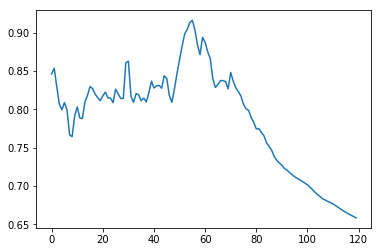

In [94]:
plt.plot(all_y_df[1])

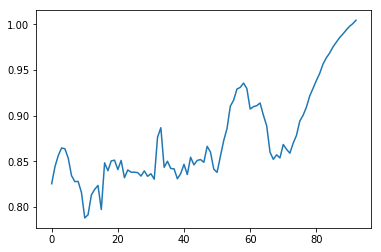

In [44]:
plt.plot(all_y_df[1])

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))